# Question 1: Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first!?

Using the NYC 311 dataset I will first import and examine the contents within

In [27]:
import pandas as pd

#import local path of NYC 311 data
data = r"F:\Portfolio Projects\edX\IBM DS0720EN Data Science and Machine Learning Capstone Project\311_Service_Requests_from_2010_to_Present_min.csv"

#create a pandas dataframe for data exploration
df = pd.read_csv(data)

#check the shape of the dataset
df.shape

(6019843, 16)

The dataset contains 6,019,843 rows by 16 columns, I will now examine a sample of the dataset as well as a list of each column header with their corresponding data type

In [28]:
#Check the first 5 rows of the dataset
df.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019843 entries, 0 to 6019842
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   Unique Key              int64  
 2   Created Date            object 
 3   Closed Date             object 
 4   Complaint Type          object 
 5   Location Type           object 
 6   Incident Zip            float64
 7   Incident Address        object 
 8   Street Name             object 
 9   Address Type            object 
 10  City                    object 
 11  Status                  object 
 12  Resolution Description  object 
 13  Borough                 object 
 14  Latitude                float64
 15  Longitude               float64
dtypes: float64(3), int64(2), object(11)
memory usage: 734.8+ MB


Keep data only for relevant columns so that the data volume is manageable. These are the recommended fields according to the IBM Data Science author:
created_date,unique_key,complaint_type, incident_zip,incident_address,street_name,address_type,city,resolution_description, borough,latitude,longitude,closed_date,location_type,status

I will keep 14 of the 16 columns by removing "Unnamed: 0" and "Closed Date"

In [30]:
df.drop(columns=['Unnamed: 0','Closed Date'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019843 entries, 0 to 6019842
Data columns (total 14 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unique Key              int64  
 1   Created Date            object 
 2   Complaint Type          object 
 3   Location Type           object 
 4   Incident Zip            float64
 5   Incident Address        object 
 6   Street Name             object 
 7   Address Type            object 
 8   City                    object 
 9   Status                  object 
 10  Resolution Description  object 
 11  Borough                 object 
 12  Latitude                float64
 13  Longitude               float64
dtypes: float64(3), int64(1), object(10)
memory usage: 643.0+ MB


In [31]:
#Looking at each unique complaint
df['Complaint Type'].unique()

array(['HEAT/HOT WATER', 'UNSANITARY CONDITION', 'APPLIANCE', 'GENERAL',
       'ELECTRIC', 'PLUMBING', 'PAINT/PLASTER', 'WATER LEAK', 'SAFETY',
       'DOOR/WINDOW', 'OUTSIDE BUILDING', 'ELEVATOR', 'FLOORING/STAIRS',
       'Unsanitary Condition', 'HPD Literature Request', 'HEATING',
       'PAINT - PLASTER', 'Safety', 'Electric', 'General', 'Appliance',
       'GENERAL CONSTRUCTION', 'NONCONST', 'CONSTRUCTION', 'AGENCY',
       'STRUCTURAL', 'VACANT APARTMENT', 'Outside Building', 'Plumbing',
       'Mold'], dtype=object)

In [32]:
#Make sure all unique complaint type is formatted the same
df["Complaint Type"] = df["Complaint Type"].str.upper()
df['Complaint Type'].unique()

array(['HEAT/HOT WATER', 'UNSANITARY CONDITION', 'APPLIANCE', 'GENERAL',
       'ELECTRIC', 'PLUMBING', 'PAINT/PLASTER', 'WATER LEAK', 'SAFETY',
       'DOOR/WINDOW', 'OUTSIDE BUILDING', 'ELEVATOR', 'FLOORING/STAIRS',
       'HPD LITERATURE REQUEST', 'HEATING', 'PAINT - PLASTER',
       'GENERAL CONSTRUCTION', 'NONCONST', 'CONSTRUCTION', 'AGENCY',
       'STRUCTURAL', 'VACANT APARTMENT', 'MOLD'], dtype=object)

In [33]:
#Merge categories where the labels changed
replace_categories = {"HEAT/HOT WATER": "HEATING", 
                      "CONSTRUCTION": "GENERAL CONSTRUCTION",
                      "PAINT - PLASTER" : "PAINT/PLASTER"             
                     } 
df["Complaint Type"] = df["Complaint Type"].replace(replace_categories)
df['Complaint Type'].unique()

array(['HEATING', 'UNSANITARY CONDITION', 'APPLIANCE', 'GENERAL',
       'ELECTRIC', 'PLUMBING', 'PAINT/PLASTER', 'WATER LEAK', 'SAFETY',
       'DOOR/WINDOW', 'OUTSIDE BUILDING', 'ELEVATOR', 'FLOORING/STAIRS',
       'HPD LITERATURE REQUEST', 'GENERAL CONSTRUCTION', 'NONCONST',
       'AGENCY', 'STRUCTURAL', 'VACANT APARTMENT', 'MOLD'], dtype=object)

In [34]:
# Check for null values in cells for good practice
df["Complaint Type"].isnull().sum()

0

In [35]:
# Check to see if there are any duplicated rows for good practice even if it is not within the database collection methodology
df.duplicated().sum()

0

In [36]:
# Count the number of each type of complaints
df['Complaint Type'].value_counts()

HEATING                   2149424
PLUMBING                   711141
PAINT/PLASTER              707695
GENERAL CONSTRUCTION       505941
UNSANITARY CONDITION       457142
ELECTRIC                   307311
NONCONST                   260890
DOOR/WINDOW                205278
WATER LEAK                 193631
GENERAL                    152471
FLOORING/STAIRS            137402
APPLIANCE                  112835
HPD LITERATURE REQUEST      52824
SAFETY                      51953
OUTSIDE BUILDING             7148
ELEVATOR                     6725
STRUCTURAL                     16
AGENCY                          9
VACANT APARTMENT                6
MOLD                            1
Name: Complaint Type, dtype: int64

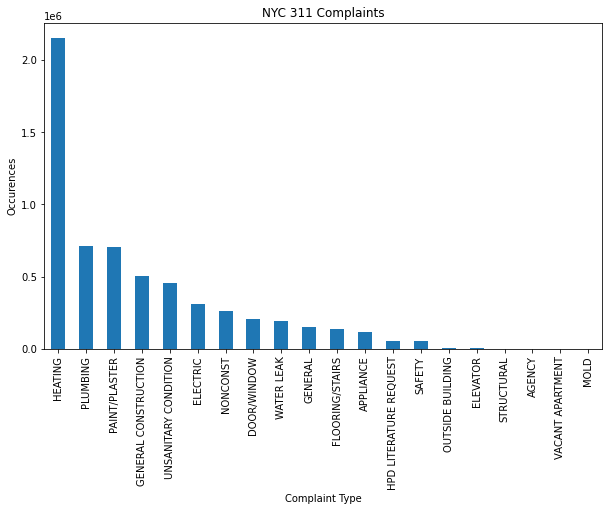

In [43]:
#Plot a quick barchart of the complaints
import matplotlib.pyplot as plt
df['Complaint Type'].value_counts().plot(kind = 'bar', figsize = (10, 6))

plt.xlabel('Complaint Type')
plt.ylabel('Occurences')
plt.title('NYC 311 Complaints')

plt.show()

From the bar chart we can conclude the Department of Housing Preservation and Development of New York City should focus on Heating as the core issue, to further elaborate I can break down the Complaints by year to further establish a better visual in the future.